# Flight Price Prediction

### Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

**Size of training set: 10683 records**

**Size of test set: 2671 records**

**There are two dataset train and test. First we will import the train dataset for building our model and then will use the test dataset for getting prediction from the trained model.**

# Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [2]:
# Reading excel file in a dataframe
df = pd.read_excel(r'C:\Users\02915P744\Downloads\Data_Train.xlsx')
df.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


* The train dataset contains the details of the prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. 
* The dataset contains both numerical and categorical data. 
* Here **Price** is the target variable and as it has continuous data, its a **Regression Problem Statement** where we use Regression algorithms to predict the prices of the flight tickets.

In [3]:
# Checking top 5 records
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Exploratory Data Analysis(EDA)

In [4]:
# Checking the dimensions of the dataset
df.shape

(10683, 11)

In [5]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
# Checking the dtypes of dataset
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

We can see that the train dataset has only object and int64 datatypes.

## Feature Engineering

Working on all the columns and converting them to numeric

The columns Date_of_Journey,Arrival_Time and Dep_Time has datetime datatype but its reflecting as object.
So lets convert this datatype into timestamp to use it properly for prediction.

In [7]:
# Converting Date and time columns from object type to Datetime type
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [8]:
# Rechecking the datatypes
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

We have converted object datatype into datetime datatype.

Now splitting Date_of_journey into Month and Day, and as the dataset contains only 2019 year data so no need to take year column.

In [9]:
# Extracting Day from Date_of_journey column
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_journey column
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

So we have splitted the column Date_of_Journey into integer datatype , now we can drop this column as it is of no use.

In [10]:
# Dropping Date_of_journey column
df.drop("Date_of_Journey",axis=1,inplace=True)

In [11]:
# Duration

df['Duration']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

#now lets convert this column into a numeric

df['Duration']=pd.to_numeric(df['Duration'])

Extracting hours and mins from Dep_Time column and dropping Dep_Time.

In [12]:
# Extracting Hours from Dep_Time column
df['Dep_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour

# Extracting Minutes from Dep_Time column
df['Dep_Min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [13]:
# Dropping Dep_Time column
df.drop("Dep_Time",axis=1,inplace=True)

Similarly extracting hours and mins from Arrival_Time column and dropping that column.

In [14]:
# Extracting Arrival_Hour from Arrival_Time column
df['Arrival_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour

# Extracting Arrival_Min from Arrival_Time column
df['Arrival_Min']=pd.to_datetime(df['Arrival_Time']).dt.minute

# Dropping Arruval_Time column
df.drop("Arrival_Time",axis=1,inplace=True)

In [15]:
# Lets check dataframe now
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,3,1,16,50,21,35


In [16]:
# Checking the dimension of dataframe now
df.shape

(10683, 14)

Now the dataset has 10683 rows and 14 columns.

Lets check value counts in each column to find if there are any unexpected or corrupted entries in the dataset.

In [17]:
# Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1


These are the list of unique values present in the columns.

From the above list of unique values,we can observe some repeated categories in some columns. Lets replace them.

In [18]:
# Replacing "Jet Airwaus Business" as "Jet Airways" in the column Airline
df["Airline"]=df["Airline"].replace("Jet Airways Business","Jet Airways")

# Replacing "Multiple carriers Premium economy" as "Multiple carriers" in Airline column
df['Airline']=df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

# Replacing "Vistara Premium economy" as "Vistara" in Airline column
df["Airline"] = df["Airline"].replace("Vistara Premium economy","Vistara")

# Replacing "New Delhi" as "Delhi" in Destination column
df["Destination"] = df["Destination"].replace("New Delhi","Delhi")

# In the column "Additional Info", "No Info" and "No info" are same so replacing it by "No Info
df['Additional_Info'] = df['Additional_Info'].replace("No info", "No Info")

# Replacing "1 Long Layover" and "2 Long layover" as "Long layover" in the column Additional Info
df['Additional_Info']=df['Additional_Info'].replace(["1 Long layover","2 Long layover"],"Long layover")


In [19]:
# Rechecking the unique values in the above columns
val_count = ["Airline","Destination","Additional_Info"]

for i in val_count:
    print(df[i].value_counts())
    print("\n")

Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64


Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


No Info                         8348
In-flight meal not included     1982
No check-in baggage included     320
Long layover                      20
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64




In [20]:
# Checking number of unique values in each column
df.nunique()

Airline               9
Source                5
Destination           5
Route               128
Duration            368
Total_Stops           5
Additional_Info       8
Price              1870
Journey_Day           9
Journey_Month         7
Dep_Hour             24
Dep_Min              12
Arrival_Hour         24
Arrival_Min          12
dtype: int64

These are the number of values present in each column.

In [21]:
# Checking for null values in the dataframe
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

We can observe null values in Route and Total_Stops column. As both the columns have categorical data, we can fill them using mode.

In [22]:
# Checking the mode of Categorical columns "Route" and "Total_Stops"
print("The mode of Route is:",df["Route"].mode())
print("The mode of Total_Stops is:",df["Total_Stops"].mode())

The mode of Route is: 0    DEL → BOM → COK
dtype: object
The mode of Total_Stops is: 0    1 stop
dtype: object


In [23]:
# Filling the missing values in "Route" withs its mode
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])

# Filling the mising values in "Total_Stops" by its mode
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [24]:
# Checking for missing values now
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

As we can see there are no null values present in the dataset.

<AxesSubplot:>

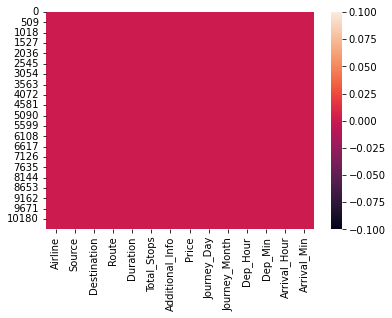

In [25]:
# Lest check missing values using heatmap
sns.heatmap(df.isnull())

So its clear from visualization too, there are no null values.

In [26]:
# Checking for columns in the dataset
df.columns.tolist()

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Hour',
 'Dep_Min',
 'Arrival_Hour',
 'Arrival_Min']

These are the columns present in ths dataset.

In [27]:
# Checking the uniqueness of target column
df["Price"].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

These are the unique values present in the target column.

In [28]:
# Checking the list of counts in the target column.
df["Price"].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

In [29]:
# Checking whether the dataset contains any space
df.loc[df['Price']==" "]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min


There is no empty space in any of the columns.

# Description of Dataset

In [30]:
# Statistical summary of the dataset
df.describe()

,Duration,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,643.093232,9087.064121,12.682205,5.534775,12.490686,24.411214,13.348778,24.690630
std,507.862001,4611.359167,8.803701,2.987489,5.748650,18.767980,6.859125,16.506036
min,5.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,520.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,930.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,2860.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


This gives the statistical information of the dataset. The summary looks perfect since there is no negative/invali values present. It gives the summary of numerical data.\
From the above description we can observe the following things.
* The counts of all columns are same which means ther are no missing values present int he dataset.
* The mean value is greater than the median(50%) in the columns Price,Journey_Day,Duration and Dep_Hour so we can say they are skewed to right.
* The median(50%) is bit greater than mean in Dep_Min,Arrival_Hour and Arrival_Min which means they are skewed to left.
* From the description we can say the minimum price of the flight tickets is Rs.1759 and maximum price is Rs.79512 and the mean is 9087.
* Also there is a huge difference in maximum and 75% percentile in the columns Price, Arrival_Min which leads to outlies in thoe columns.
* The std of target variable is high which means it has high rate of dispersion.

# Description Visualization

### Lets separate numerical and categorical column.

In [31]:
# Checking categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i) 
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [32]:
# Checking numerical column
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Duration', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


# Data Visualization

## Univariate Analysis

##### Plotting Categorical columns

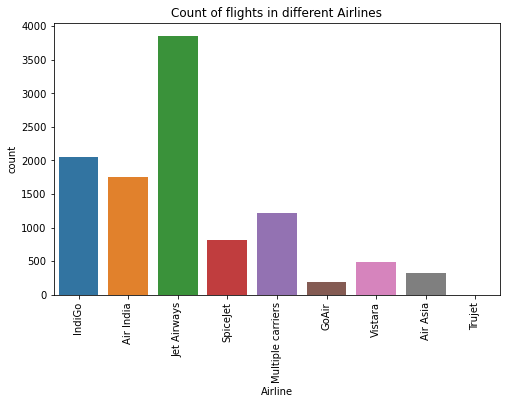

In [33]:
# Visualizing the various Airlines present in the dataset
plt.figure(figsize=(8,5))
sns.countplot(df["Airline"])
plt.title("Count of flights in different Airlines")
plt.xticks(rotation=90)
plt.show()

Jet Airways flights has high counts whereas Trujet and GoAir has the least counts.

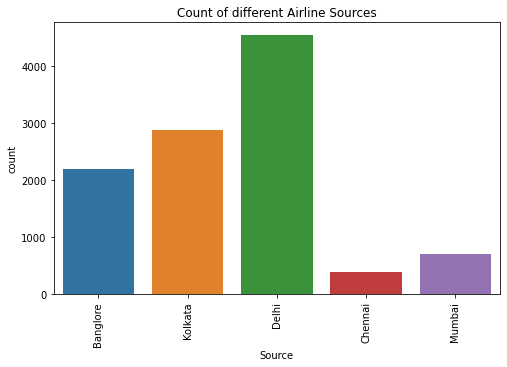

In [34]:
# Visualizing the various Source from which place the service begins
plt.figure(figsize=(8,5))
sns.countplot(df["Source"])
plt.title("Count of different Airline Sources")
plt.xticks(rotation=90)
plt.show()

The majority of Airline source is from Delhi while the least is from Chennai.

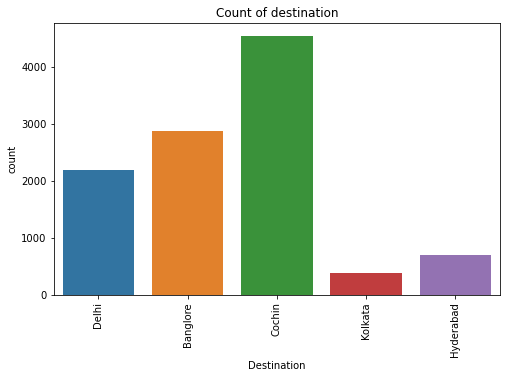

In [35]:
# Visualizing the destination from which place the service ends
plt.figure(figsize=(8,5))
sns.countplot(df["Destination"])
plt.title("Count of destination")
plt.xticks(rotation=90)
plt.show()

The Cochin destination has highest counts. Most of the flights services ends in Cochin destination.

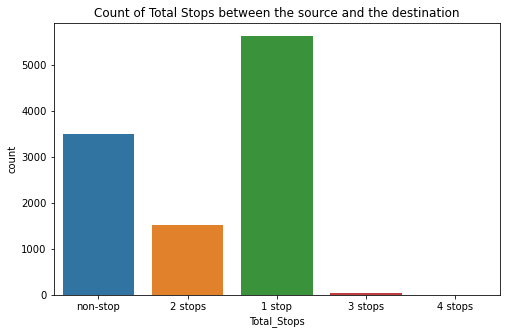

In [36]:
# Visualizing the Total Stops between the source and the destination
plt.figure(figsize=(8,5))
sns.countplot(df["Total_Stops"])
plt.title("Count of Total Stops between the source and the destination")
plt.show()

Majority of flights has 1 stop between the source and destination, followed by non stop. No flights have 4 stops between the source and destination.

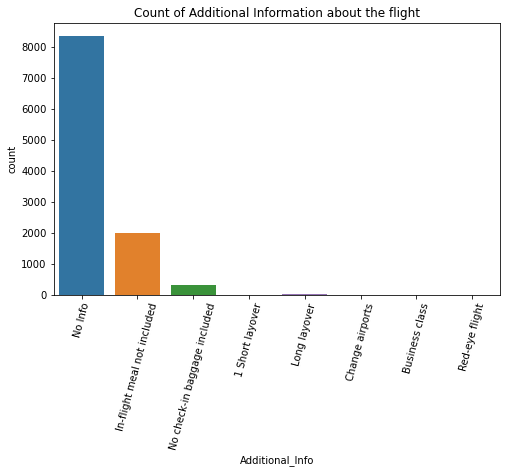

In [37]:
# Visualizing the Additional Information about the flight
plt.figure(figsize=(8,5))
sns.countplot(df["Additional_Info"])
plt.title("Count of Additional Information about the flight")
plt.xticks(rotation=75)
plt.show()

There is no much information about the flights that we can see in the plot.

## Distribution of skewness

### Plotting numerical columns

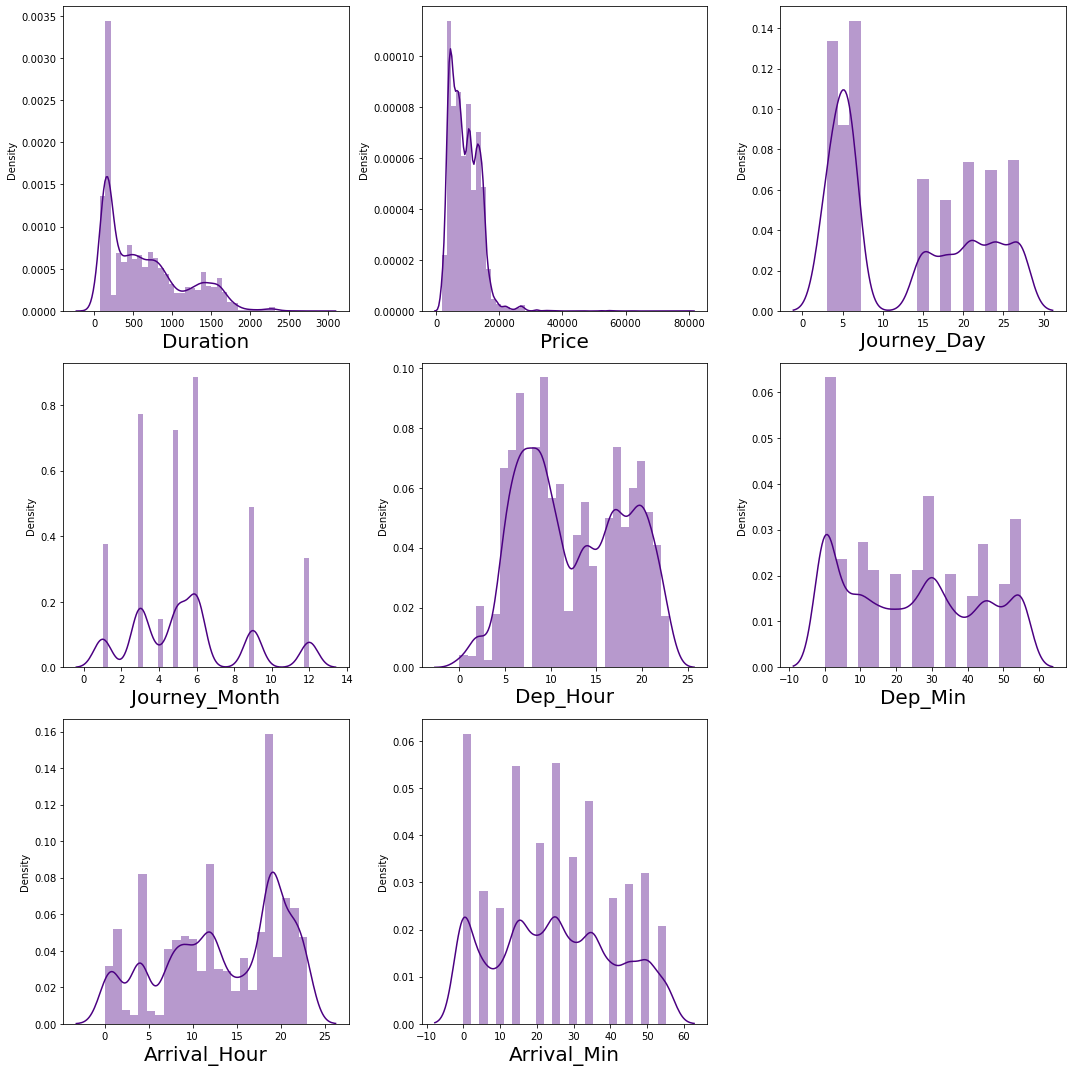

In [38]:
# Checking numerical columns
plt.figure(figsize=(15,15))
plotnumber=1
for col in numerical_col:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='indigo')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()
        

From the distribution plot we can observe that the data i not normally distributed in some columns and some columns are almost normal but have no proper bell shape curve. The Journey_Month, Duration and Price columns are skewed to right as mean is more than the median.

## Bivariate Analysis

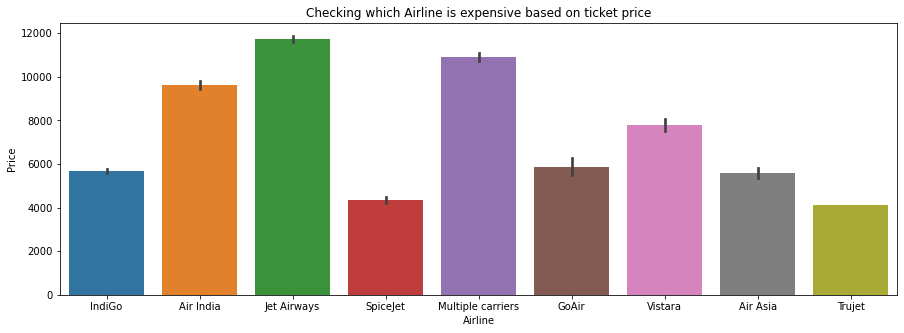

In [39]:
# Lets check which Airline is expensive based on Price of tickets
plt.figure(figsize=(15,5))
sns.barplot(df['Airline'],df["Price"],data=df)
plt.title("Checking which Airline is expensive based on ticket price")
plt.show()

* The barplot shows that the Jet Airways is most expensive Airline followed by Multiple carriers and Air India.
* The Trujet and Spicejet have low ticket prices compared to others.

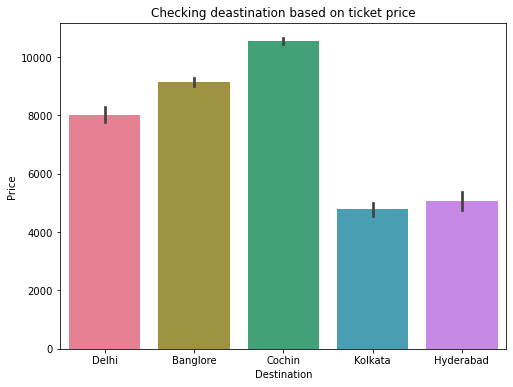

In [40]:
# Let's check how prices changes in each destination 

plt.figure(figsize=(8,6))
sns.barplot(df["Destination"],df["Price"],data=df,palette="husl" )
plt.title("Checking deastination based on ticket price")
plt.show()

The ticket price is high in Cochin destination followed by Bangalore.

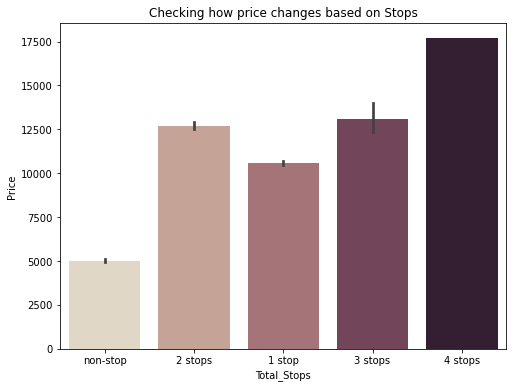

In [41]:
# Let's check the price vs total stops

plt.figure(figsize=(8,6))
sns.barplot(df["Total_Stops"],df["Price"],data=df,palette="ch:.28")
plt.title("Checking how price changes based on Stops")
plt.show()

We can see flights with 4 stops have highest price followed by flights having 3 stops and the flights which have no stops is having very less ticket price compared to others.

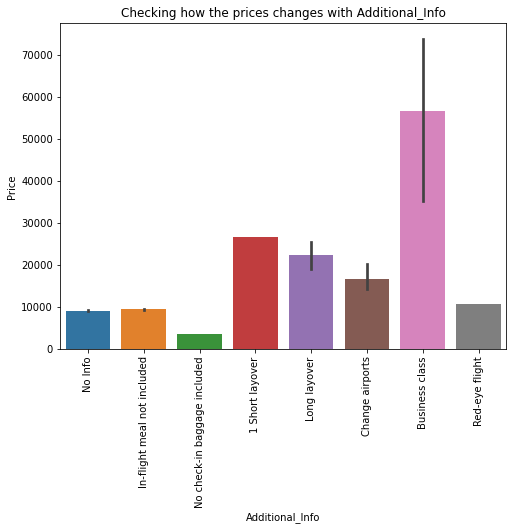

In [42]:
#Let's compare Additional_Info and Price of the flights

plt.figure(figsize=(8,6))
sns.barplot(df["Additional_Info"],df["Price"],data=df)
plt.title("Checking how the prices changes with Additional_Info")
plt.xticks(rotation=90)
plt.show()

This plot shows that the Business class flights are more expensive compared to others and the flights having the class No check-in baggage included has very least ticket price.

<AxesSubplot:xlabel='Dep_Hour', ylabel='Price'>

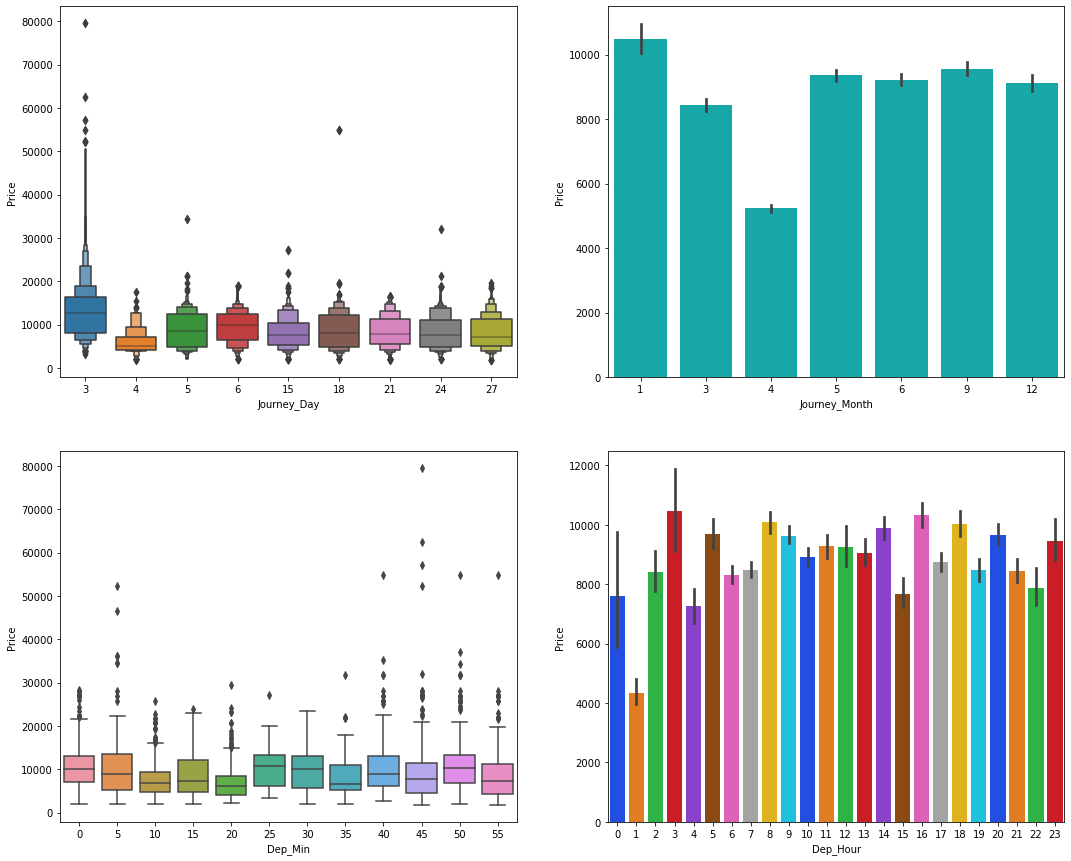

In [43]:
fig, axes = plt.subplots(2,2,figsize=(18,15))

# Checking relation between Journey_Day and Price
sns.boxenplot(x='Journey_Day',y='Price',ax = axes[0,0],data=df)

# Checking relation between Journey_Mionth and Price
sns.barplot(x='Journey_Month',y='Price',ax = axes[0,1],data=df,color='c')

# Checking relation between Dep_Min and Price
sns.boxplot(x='Dep_Min',y='Price',ax=axes[1,0],data=df)

# Checking relation between Dep_Hour and Price
sns.barplot(x='Dep_Hour',y='Price',ax=axes[1,1],data=df,palette="bright")

From the above plots we can observe the following 
* While comparing Journey_Day and Price we can see the price of ticket is high in Day 3 apart from this there is no much impact of day on ticket price.
* While comparing Journey_Month and Price we can state that the flights travelling in January month are more expensive than others and the flights traveeling in April month have very cheap ticket prices.
* There is no significance relation between Dep_Min and Price of the tickets.
* In the fourth graph also we can say that there is no much impact of Dep_Hour on Proice.

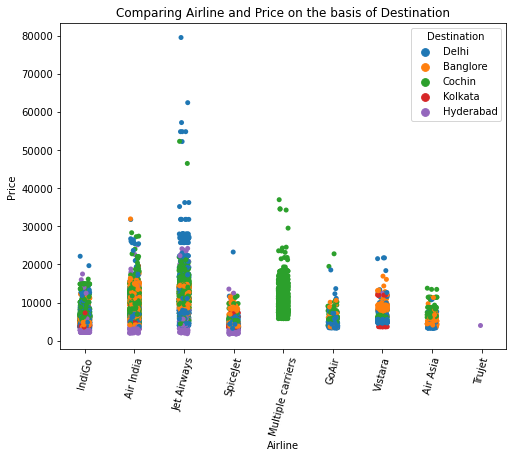

In [44]:
# Checking how the price pays role in Airline on the basis of destination
plt.figure(figsize=(8,6))
sns.stripplot(x=df['Airline'],y=df['Price'],hue=df["Destination"])
plt.title("Comparing Airline and Price on the basis of Destination")
plt.xticks(rotation=75)
plt.show()

Here we can conclude that the JetAirways flights taht are destined to Delhi are having more expensive ticket prices compared to others.

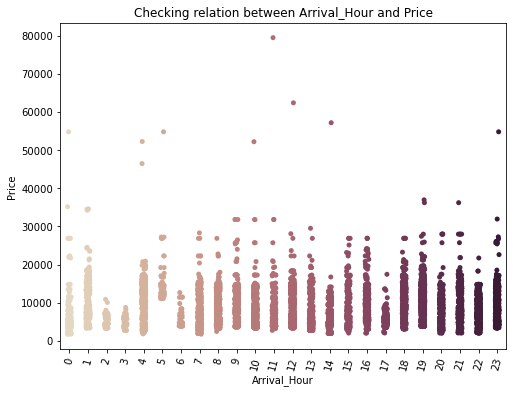

In [45]:
#Checking relation between Arrival_Hour and Price
plt.figure(figsize=(8,6))
plt.title("Checking relation between Arrival_Hour and Price")
sns.stripplot(x='Arrival_Hour',y='Price',data=df, palette="ch:.28")
plt.xticks(rotation=75)
plt.show()

And we can see there is no relation of Arrival_time with the Price.

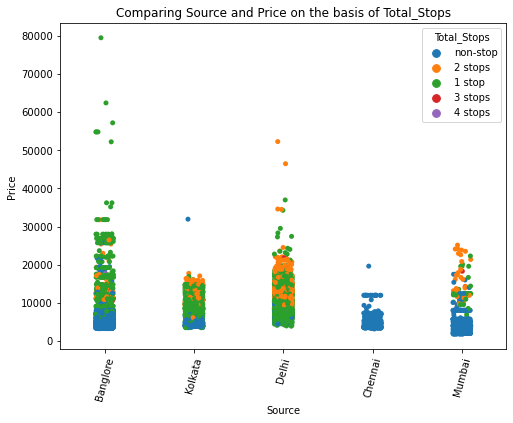

In [46]:
# Checking how the price pays role in Source on the basis of Total_Stops
plt.figure(figsize=(8,6))
sns.stripplot(x=df['Source'],y=df['Price'],hue=df["Total_Stops"])
plt.title("Comparing Source and Price on the basis of Total_Stops")
plt.xticks(rotation=75)
plt.show()

As we can say that the flights in the Bangalore source which have only one stop between source and detination are very expensive while Chennai with no stops have very cheap prices compared to other source flights.

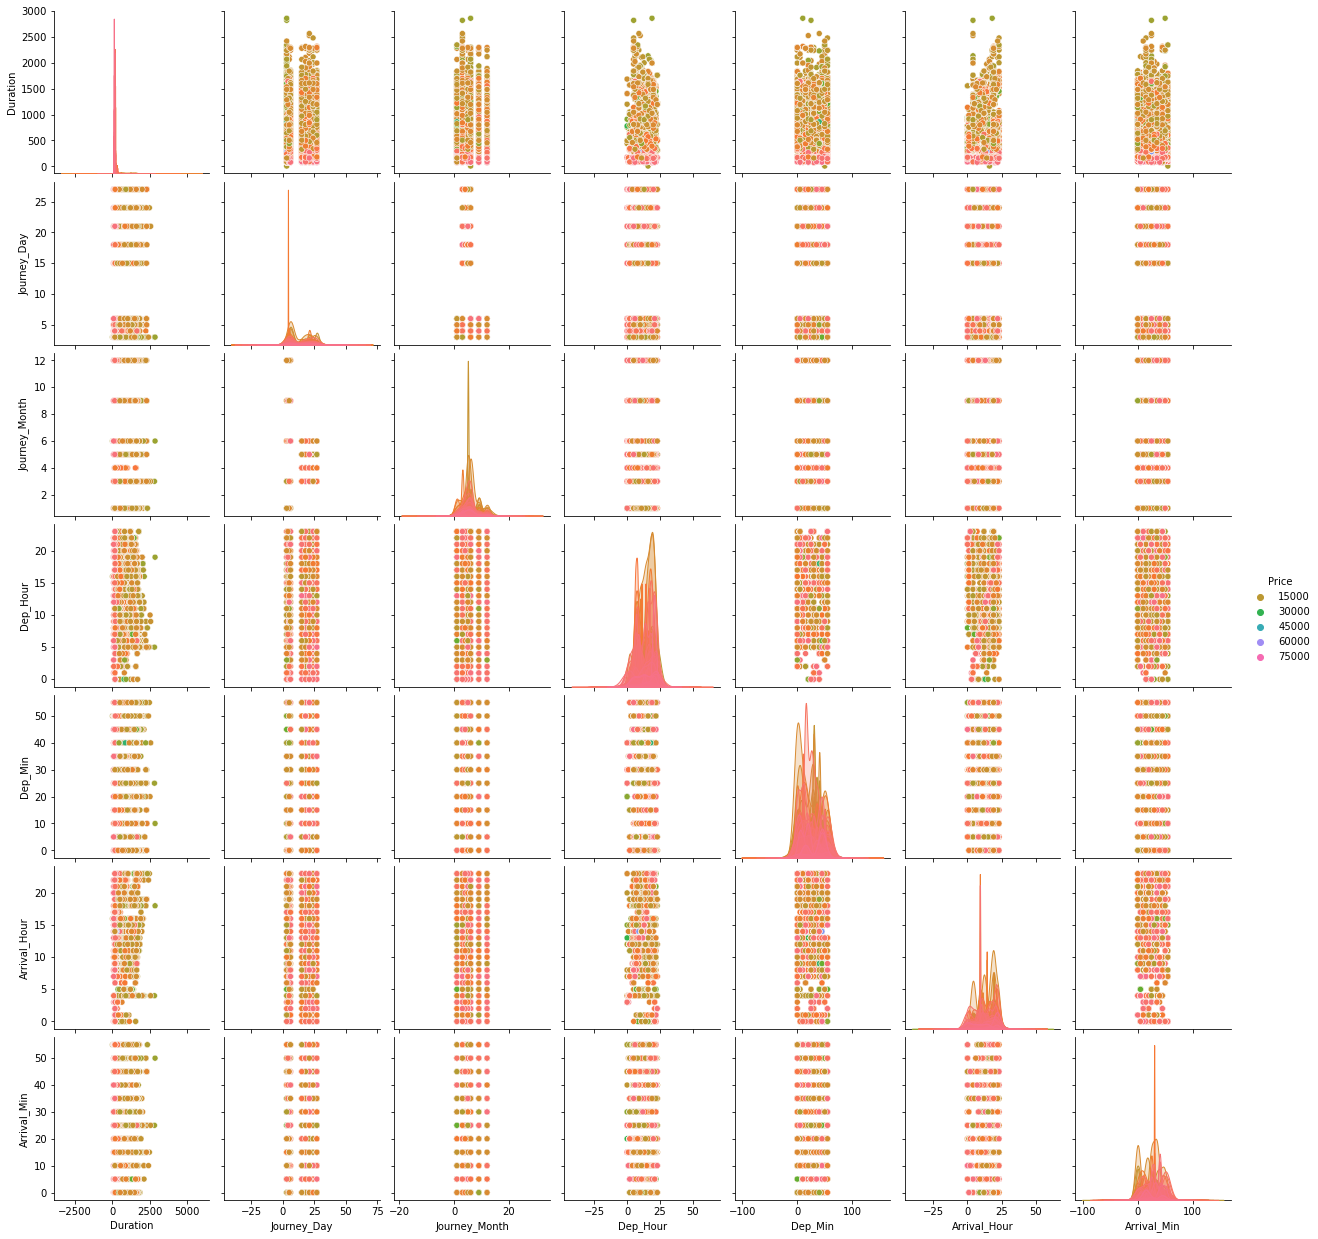

In [47]:
sns.pairplot(df,hue="Price",palette='husl')
plt.show()

* This pairplot gives the pairwise relation betweeen the columns which is plotted on the basis of target variable "Price". Here we can observe the relation between the features and the label.
* Here we can observe the correlation between the features and on the diagonal we can notice the distribution plot which shows whether the columns has skewness or not.
* We can also see the linear relation between the features.

# Outliers

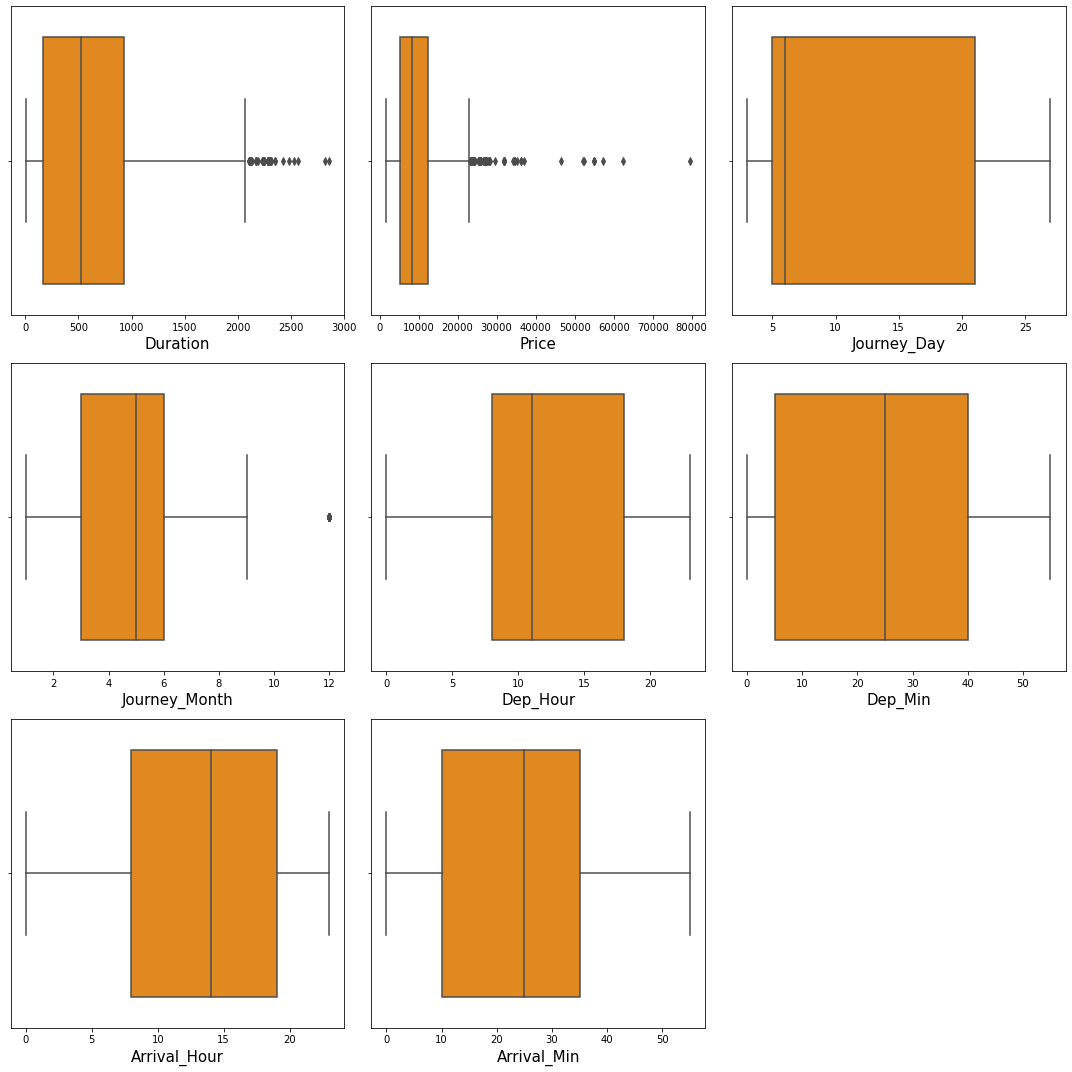

In [48]:
# Identifying the outliers using boxplot

plt.figure(figsize=(15,15),facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color="darkorange")
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.tight_layout()        

* The outliers are present in the columns "Duration","Journey_Month" and the target variable "Price".
* Since "Price" is the target column so no need to remove outliers from this column.
* We need to remove the outliers from the other two columns using zscore or IQR methods.

# Removing Outliers

## Zscore method

In [49]:
from scipy.stats import zscore
# Features containing outliers
features = df[["Duration","Journey_Month"]]
z = np.abs(zscore(features))
z

,Duration,Journey_Month
0,0.931583,0.848503
1,0.390072,1.517993
2,0.978475,1.159966
3,0.626367,2.164201
4,0.705132,1.517993
...,...,...
10678,0.970965,1.159966
10679,0.961120,0.513758
10680,0.911891,0.513758
10681,0.951274,1.517993


The outliers are removed

In [50]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,170,non-stop,No Info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No Info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No Info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No Info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285,1 stop,No Info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,150,non-stop,No Info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,155,non-stop,No Info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,180,non-stop,No Info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,Delhi,BLR → DEL,160,non-stop,No Info,12648,3,1,11,30,14,10


This is the new dataframe after removing outliers. Here we have removed the outliers whose zscore is less than 3.

In [51]:
# Checking the dimensions of both dataframes.
print(df.shape)
print(new_df.shape)

(10683, 14)
(10617, 14)


###### Checking data loss

In [52]:
loss = (10683-10617)/10683*100
loss

0.6178039876439202

Here we are losing very less data.
Lets try using IQR.

# Checking Skewness

In [53]:
# Checking skewness 
new_df.skew()

Duration         0.774266
Price            1.824502
Journey_Day      0.367029
Journey_Month    0.628224
Dep_Hour         0.103798
Dep_Min          0.164551
Arrival_Hour    -0.361250
Arrival_Min      0.107805
dtype: float64

Outcome of the skewness:
* Skewness threshold is taken as +/-0.65.
* We can find the skewnwss present in Price, Duration and Journey_Month columns.
* As Price is the target column no need to remove skewness from that column but will remove skewness from the other two columns.

## Removing Skewness using log transformation

In [54]:
new_df['Duration'] = np.log1p(new_df['Duration'])
new_df['Journey_Month'] = np.log1p(new_df['Journey_Month'])

In [55]:
# Checking skewness again
new_df.skew()

Duration        -0.178335
Price            1.824502
Journey_Day      0.367029
Journey_Month   -0.533689
Dep_Hour         0.103798
Dep_Min          0.164551
Arrival_Hour    -0.361250
Arrival_Min      0.107805
dtype: float64

We can observe the skewness has been removed from Duration and Journey_Month columns.

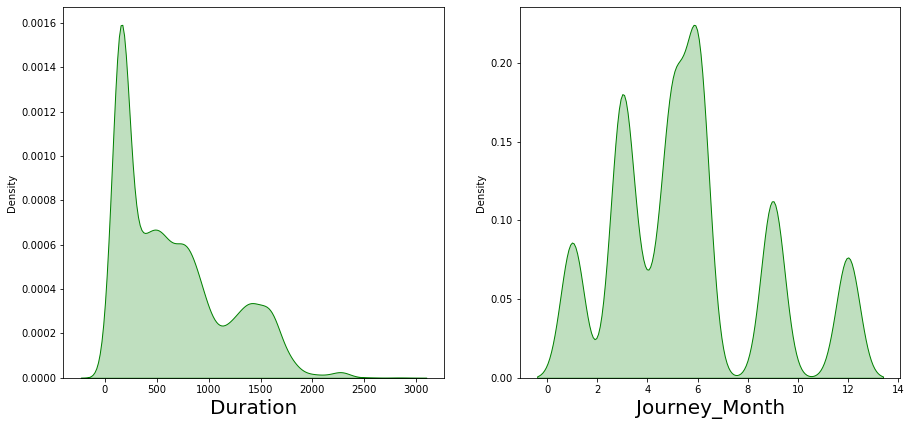

In [56]:
# Checking how the data has been distributed after removing skewness.
skew = ["Duration","Journey_Month"]
plt.figure(figsize=(15,15),facecolor="white")
plotnumber=1
for column in new_df[skew]:
    if plotnumber<=2:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data looks almost normal and skewness is also removed.

## Label Encoding Categorical data

In [57]:
categorical_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [58]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(lbl.fit_transform)
new_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,18,5.141664,4,5,3897,24,1.386294,22,20,1,10
1,1,3,0,84,6.100319,1,5,7662,5,0.693147,5,50,13,15
2,4,2,1,118,7.039660,1,5,13882,6,2.302585,9,25,4,25
3,3,3,0,91,5.786897,0,5,6218,5,2.564949,18,5,23,30
4,3,0,2,29,5.655992,0,5,13302,3,0.693147,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,5.017280,4,5,4107,4,2.302585,19,55,22,25
10679,1,3,0,64,5.049856,4,5,4145,27,1.609438,20,45,23,20
10680,4,0,2,18,5.198497,4,5,7229,27,1.609438,8,20,11,20
10681,8,0,2,18,5.081404,4,5,12648,3,0.693147,11,30,14,10


We have converted the categorical columns into numerical columns using label encoder.

# Correlation

In [59]:
# Checking the correlation between features and label
cor = new_df.corr()
cor

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.013641,0.055391,0.021921,-0.077818,-0.010497,-0.056234,0.024773,0.025366,0.005402,-0.028238,-0.070340,-0.005868,-0.087465
Source,-0.013641,1.000000,-0.434677,0.404009,0.122739,-0.225922,-0.034128,0.016718,0.007158,0.062011,0.059469,-0.055929,0.026144,0.021640
Destination,0.055391,-0.434677,1.000000,-0.230755,-0.509154,0.510659,0.115602,-0.263334,0.007309,-0.061873,-0.088810,0.097052,-0.058190,0.006954
Route,0.021921,0.404009,-0.230755,1.000000,0.368475,-0.439372,0.002232,0.163635,0.096042,0.076196,-0.070005,-0.066420,0.011514,-0.174071
Duration,-0.077818,0.122739,-0.509154,0.368475,1.000000,-0.809980,-0.251284,0.605786,-0.042848,0.061807,-0.001689,-0.033797,0.056730,-0.125315
Total_Stops,-0.010497,-0.225922,0.510659,-0.439372,-0.809980,1.000000,0.234493,-0.572413,0.043711,-0.048791,0.038512,0.049105,-0.095213,0.176915
Additional_Info,-0.056234,-0.034128,0.115602,0.002232,-0.251284,0.234493,1.000000,-0.114590,-0.012301,-0.025319,-0.052282,0.008984,-0.005902,0.044179
Price,0.024773,0.016718,-0.263334,0.163635,0.605786,-0.572413,-0.114590,1.000000,-0.163765,-0.013511,0.011430,-0.025585,0.021107,-0.088909
Journey_Day,0.025366,0.007158,0.007309,0.096042,-0.042848,0.043711,-0.012301,-0.163765,1.000000,-0.097582,-0.002628,-0.017421,-0.001501,-0.021901
Journey_Month,0.005402,0.062011,-0.061873,0.076196,0.061807,-0.048791,-0.025319,-0.013511,-0.097582,1.000000,0.020587,-0.005264,-0.005743,-0.031453


This gives the correlation between the dependent and independent variables. We can visualize this by plotting heatmap.

<AxesSubplot:>

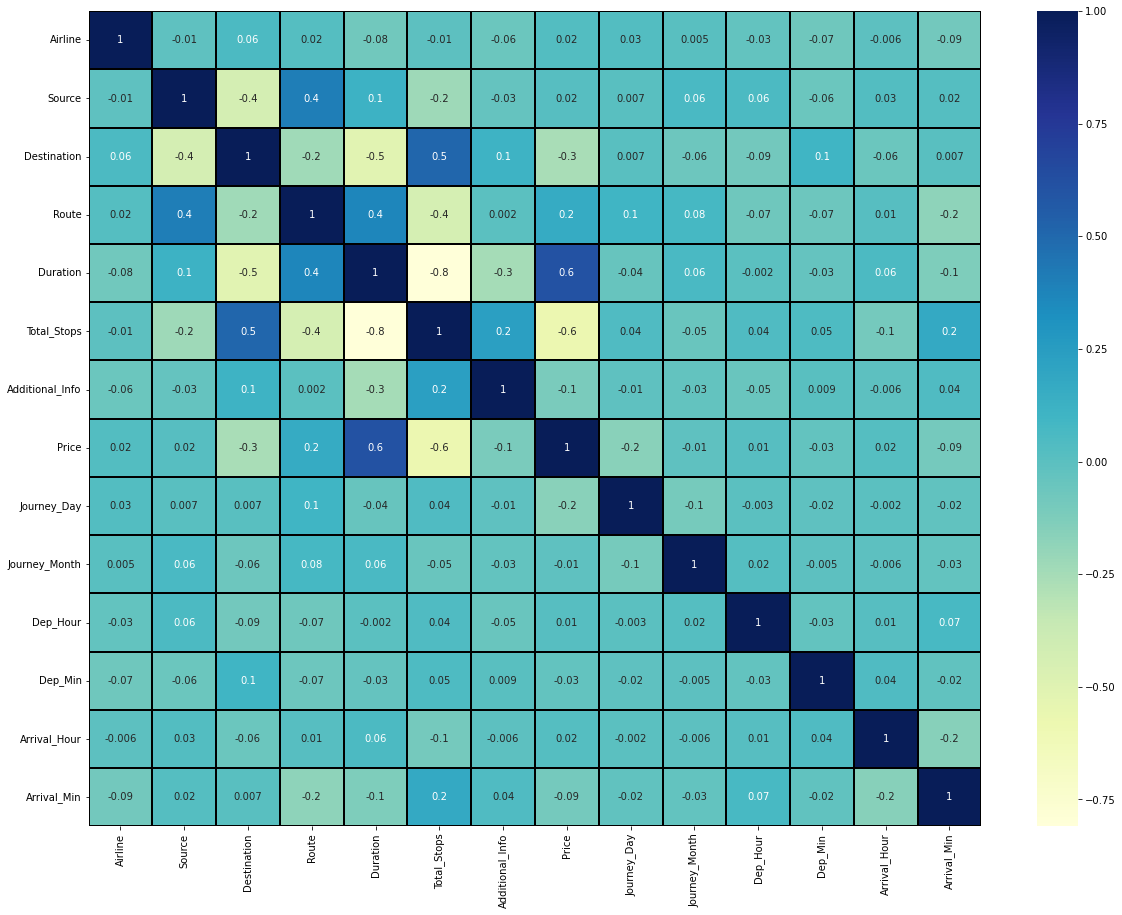

In [60]:
# Visualizing the correlation matrix by plotting heatmap.
plt.figure(figsize=(20,15))
sns.heatmap(new_df.corr(),linewidths=.1,fmt=".1g",linecolor="black",annot=True,cmap="YlGnBu")

This heatmap shows the correaltion matrix by visualizing the data. We can observe the relation between one feature to other.
* This heatmap contain both positive and negative correlation.
* The feature Duration is **highly positively correlated** with the target variable "Price".
* The feature Total_Stops is **highly Negatively correlated** with the label.
* The features Duration, Total_Stops and Destination are highly negatively correlated with each other.This may lead to multicollinearity problem, we will check vif values to avoid this.



In [61]:
cor["Price"].sort_values(ascending=False)

Price              1.000000
Duration           0.605786
Route              0.163635
Airline            0.024773
Arrival_Hour       0.021107
Source             0.016718
Dep_Hour           0.011430
Journey_Month     -0.013511
Dep_Min           -0.025585
Arrival_Min       -0.088909
Additional_Info   -0.114590
Journey_Day       -0.163765
Destination       -0.263334
Total_Stops       -0.572413
Name: Price, dtype: float64

We can see the positive and negative correlation of target and features.

## Visualizing the correlation between features and label using bar plot.

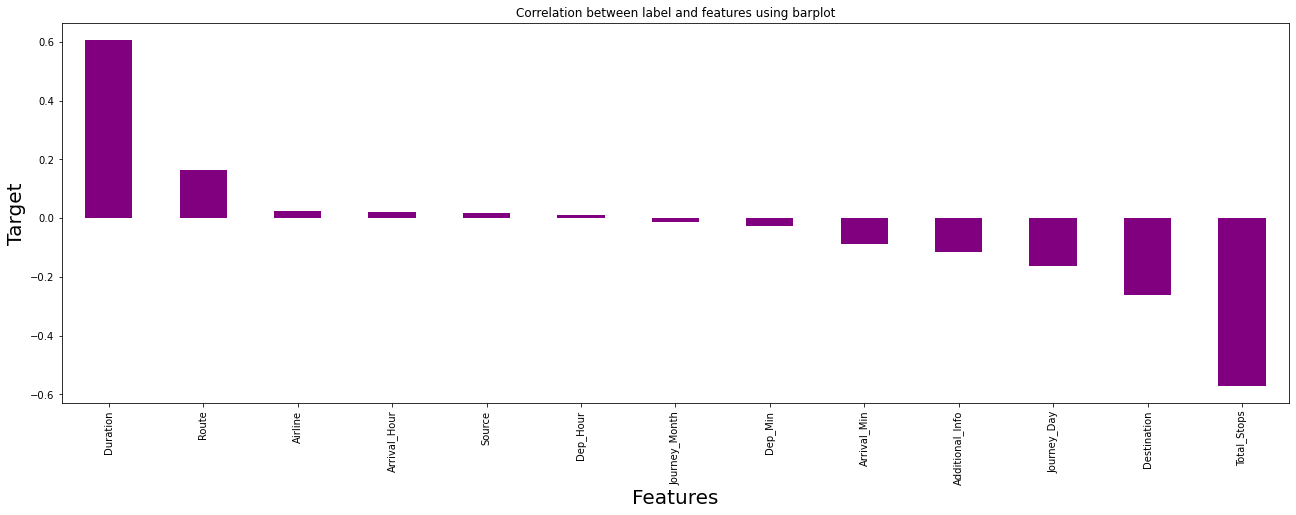

In [62]:
plt.figure(figsize=(22,7))
new_df.corr()["Price"].sort_values(ascending=False).drop(["Price"]).plot(kind="bar",color="purple")
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation between label and features using barplot')
plt.show()

The features Journey_Month, Source, Arrival_Hour,Dep_Hour and Airline have very less correlation with the label so we can drop thee columns.

# Separating the features and label.

In [63]:
x = new_df.drop("Price",axis=1)
y = new_df["Price"]

In [64]:
x.shape

(10617, 13)

In [65]:
y.shape

(10617,)

## Feature Scaling using Standard Scalarization

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,-0.345488,-1.655042,0.812707,-1.544003,-1.058285,1.402360,0.424603,1.286176,-0.754967,1.649475,-0.235894,-1.794784,-0.889208
1,-1.464134,0.888124,-1.157048,0.254498,0.007344,-0.253797,0.424603,-0.873920,-2.141814,-1.312186,1.362715,-0.046050,-0.586465
2,0.213836,0.040402,-0.172170,1.180998,1.051504,-0.253797,0.424603,-0.760231,1.078344,-0.615325,0.030541,-1.357601,0.019019
3,-0.345488,0.888124,-1.157048,0.445248,-0.341051,-0.805850,0.424603,-0.873920,1.603281,0.952614,-1.035199,1.411228,0.321762
4,-0.345488,-1.655042,0.812707,-1.244253,-0.486564,-0.805850,0.424603,-1.101299,-2.141814,0.604183,1.362715,1.119772,0.624504
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10612,-2.023458,0.888124,-1.157048,-0.290502,-1.196549,1.402360,0.424603,-0.987609,1.078344,1.126829,1.629150,1.265500,0.019019
10613,-1.464134,0.888124,-1.157048,-0.290502,-1.160337,1.402360,0.424603,1.627244,-0.308502,1.301044,1.096280,1.411228,-0.283723
10614,0.213836,-1.655042,0.812707,-1.544003,-0.995110,1.402360,0.424603,1.627244,-0.308502,-0.789540,-0.235894,-0.337506,-0.283723
10615,2.451129,-1.655042,0.812707,-1.544003,-1.125269,1.402360,0.424603,-1.101299,-2.141814,-0.266894,0.296976,0.099677,-0.889208


We have scaled the data using Standard Scalarization method to overcome the problem of biasness.

## Checking VIF

In [67]:
# Finding variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,1.043901,Airline
1,1.529957,Source
2,1.773160,Destination
3,1.561303,Route
4,3.307864,Duration
5,3.393121,Total_Stops
6,1.103963,Additional_Info
7,1.035535,Journey_Day
8,1.022210,Journey_Month
9,1.031697,Dep_Hour


As we can notice the vif values is less than 10 in all the columns,there is no multicollinearity exists. WE can move ahead for model building.

# Modeling

### Finding the best random state

In [68]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [69]:
from sklearn.ensemble import RandomForestRegressor
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print("Maximum r2_score is ",maxAccu,"at random_state",maxRS)    

Maximum r2_score is  0.9150145553895112 at random_state 0


We have got best random state at 0.

## Creating new train_test_split

In [70]:
x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.30,random_state=maxRS)

# Regression Algorithms

In [71]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Random Forest Regressor

In [72]:
# Checking R2 score for RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR = RFR.predict(x_test)
print("R2_score:",r2_score(y_test,predRFR))
print("MAE:",metrics.mean_absolute_error(y_test,predRFR))
print("MSE:",metrics.mean_squared_error(y_test,predRFR))
print("RSME:",np.sqrt(metrics.mean_squared_error(y_test,predRFR)))

R2_score: 0.8955224212961613
MAE: 694.0875334798076
MSE: 2165737.8990896456
RSME: 1471.644623912188


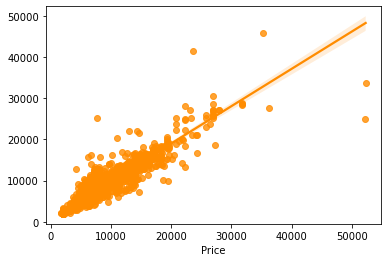

In [73]:
# Visualizing the predicted values
sns.regplot(y_test,predRFR,color='darkorange')
plt.show()

The predicted R2 score using Random Forest Regressor is 88.92%.

# Decision Tree Regressor

In [74]:
# Checking R2 score for DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR = DTR.predict(x_test)
print("R2_score:",r2_score(y_test,predDTR))
print("MAE:",metrics.mean_absolute_error(y_test,predDTR))
print("MSE:",metrics.mean_squared_error(y_test,predDTR))
print("RSME:",np.sqrt(metrics.mean_squared_error(y_test,predDTR)))

R2_score: 0.7818470069598993
MAE: 781.9212178279975
MSE: 4522139.684784125
RSME: 2126.5323145403


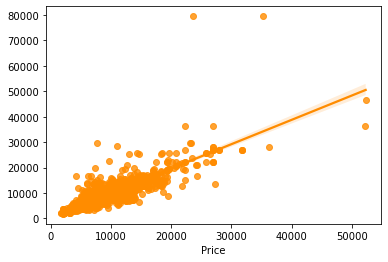

In [75]:
# Visualizing the predicted values
sns.regplot(y_test,predDTR,color='darkorange')
plt.show()

The predicted R2 score using DecisionTreeRegressor is 77.93%.

# GradientBoostingRegressor

In [76]:
# Checking R2 score for GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print("R2_score:",r2_score(y_test,predGB))
print("MAE:",metrics.mean_absolute_error(y_test,predGB))
print("MSE:",metrics.mean_squared_error(y_test,predGB))
print("RSME:",np.sqrt(metrics.mean_squared_error(y_test,predGB)))

R2_score: 0.820503075372821
MAE: 1263.255162848369
MSE: 3720829.839836593
RSME: 1928.9452661588386


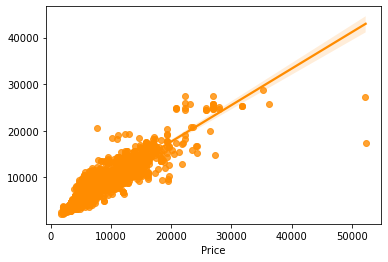

In [77]:
# Visualizing the predicted values
sns.regplot(y_test,predGB,color='darkorange')
plt.show()

The predicted R2 score using GradientBoostingRegressor is 82.05%.

# BaggingRegressor

In [78]:
# Checking R2 score for BaggingRegressor
BR = BaggingRegressor()
BR.fit(x_train,y_train)
predBR = BR.predict(x_test)
print("R2_score:",r2_score(y_test,predBR))
print("MAE:",metrics.mean_absolute_error(y_test,predBR))
print("MSE:",metrics.mean_squared_error(y_test,predBR))
print("RSME:",np.sqrt(metrics.mean_squared_error(y_test,predBR)))

R2_score: 0.8902132688203838
MAE: 730.1004265686187
MSE: 2275792.447361969
RSME: 1508.5729837704137


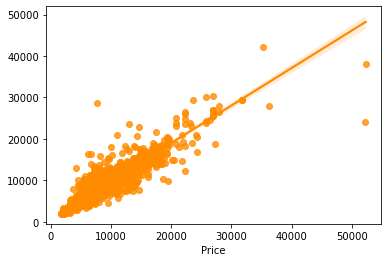

In [79]:
# Visualizing the predicted values
sns.regplot(y_test,predBR,color='darkorange')
plt.show()

Thr predicted R2 score using BaggingRegressor is 87.22%.

# ExtraTreesRegressor

In [80]:
# Checking R2 score for ExtraTreesRegressor
XT = ExtraTreesRegressor()
XT.fit(x_train,y_train)
predXT = XT.predict(x_test)
print("R2_score:",r2_score(y_test,predXT))
print("MAE:",metrics.mean_absolute_error(y_test,predXT))
print("MSE:",metrics.mean_squared_error(y_test,predXT))
print("RSME:",np.sqrt(metrics.mean_squared_error(y_test,predXT)))

R2_score: 0.8955044338404439
MAE: 686.5453415986607
MSE: 2166110.76487615
RSME: 1471.7713018251682


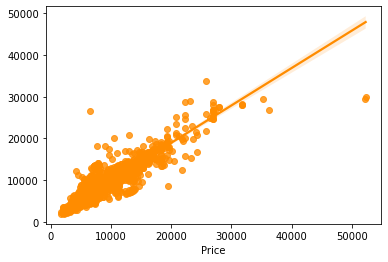

In [81]:
# Visualizing the predicted values
sns.regplot(y_test,predXT,color='darkorange')
plt.show()

The predicted R2 score using ExtraTreesRegressor is 89.57%.

# XGBRegressor

In [82]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb

XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)
predXGB = XGB.predict(x_test)
print("R2_score:",r2_score(y_test,predXGB))
print("MAE:",metrics.mean_absolute_error(y_test,predXGB))
print("MSE:",metrics.mean_squared_error(y_test,predXGB))
print("RSME:",np.sqrt(metrics.mean_squared_error(y_test,predXGB)))

R2_score: 0.9120005978855135
MAE: 762.0725667777483
MSE: 1824158.2799005907
RSME: 1350.6140380954844


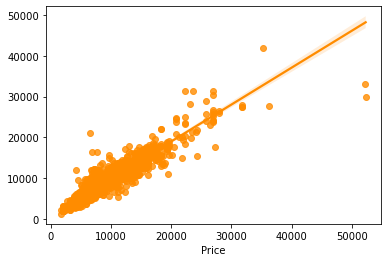

In [83]:
# Visualizing the predicted values
sns.regplot(y_test,predXGB,color='darkorange')
plt.show()

The predicted R2 score using XGBRegressor is 91.20%.

## Checking the cross validation score

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
# Checking cv score for Random Forest Regressor
score=cross_val_score(RFR,x,y,cv=5)
print(score)
print("cross validation score:  ",score.mean())
print("Difference between R2 score and cross validation score is - ",r2_score(y_test,predRFR)-abs(score.mean()))

[0.86364738 0.87468492 0.89782752 0.90271401 0.83847851]
cross validation score:   0.8754704671687028
Difference between R2 score and cross validation score is -  0.020051954127458527


In [86]:
# Checking cv score for DecisionTreeRegressor
score=cross_val_score(DTR,x,y,cv=5)
print(score)
print("cross validation score:  ",score.mean())
print("Difference between R2 score and cross validation score is - ",r2_score(y_test,predDTR)-abs(score.mean()))

[0.8208061  0.79439769 0.81325468 0.81723559 0.70238244]
cross validation score:   0.7896153004965037
Difference between R2 score and cross validation score is -  -0.007768293536604465


In [87]:
# Checking cv score for GradientBoostingRegressor
score=cross_val_score(GB,x,y,cv=5)
print(score)
print("cross validation score:  ",score.mean())
print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,predGB)-abs(score.mean()))

[0.78434633 0.80334757 0.83154952 0.81204137 0.79200108]
cross validation score:   0.8046571724934587
Difference between R2 score and cross validatio score is -  0.015845902879362272


In [88]:
# Checking cv score for BaggingRegressor
score=cross_val_score(BR,x,y,cv=5)
print(score)
print("cross validation score:  ",score.mean())
print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,predBR)-abs(score.mean()))

[0.87515201 0.85029296 0.86992357 0.89788247 0.83485464]
cross validation score:   0.8656211291239645
Difference between R2 score and cross validatio score is -  0.02459213969641927


In [89]:
# Checking cv score for ExtraTreesRegressor
score=cross_val_score(XT,x,y,cv=5)
print(score)
print("cross validation score:  ",score.mean())
print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,predXT)-abs(score.mean()))

[0.89198298 0.88093258 0.91858129 0.90492174 0.8910551 ]
cross validation score:   0.8974947360523584
Difference between R2 score and cross validatio score is -  -0.001990302211914541


In [90]:
# Checking cv score for XGBRegressor
score=cross_val_score(XGB,x,y,cv=5)
print(score)
print("cross validation score:  ",score.mean())
print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,predXGB)-abs(score.mean()))

[0.88124247 0.87221619 0.91588799 0.90545172 0.8836272 ]
cross validation score:   0.8916851132072153
Difference between R2 score and cross validatio score is -  0.020315484678298135


XGBRegressor model have highest accuracy i.e. 91.20%% with 89.16% cross validation score which is good and the difference is too less

# Hyperparameter tuning

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
#XGBRegressor

parameters = {'n_estimator':[50,100,200,400],
            'gamma':np.arange(0,0.2,0.1),
            'max_depth':[4,6,8,10],
            'n_jobs':[-2,-1,1]}

In [93]:
GCV = GridSearchCV(xgb(),parameters,cv=5)

In [94]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...ot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'gamma': array([0. , 0.1]), 'max_depth': [4, 6, 8, 10],
                         'n_estimator': [50, 100, 200, 400],
                         'n_jobs': [-2, -1, 1]})

In [95]:
GCV.best_params_

{'gamma': 0.0, 'max_depth': 6, 'n_estimator': 50, 'n_jobs': -2}

In [96]:
Final_model = xgb(gamma=0.0,max_depth=6,n_estimator=50,n_jobs=-2)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))

R2_Score: 91.20005978855134
RMSE value: 1350.6140380954844
MAE: 762.0725667777483
MSE: 1824158.2799005907


After tuning, the best R2 score is 91.20%.

# Saving the model

In [97]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model,'Flight_Prediction.pkl')

['Flight_Prediction.pkl']

# Predicting the saved model

In [98]:
# Loading the saved model
Model = joblib.load("Flight_Prediction.pkl")

# prediction
a = np.array(y_test)
predicted = np.array(Model.predict(x_test))
df_com = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_com

,Original,Predicted
0,17024,16208.969727
1,7817,9413.871094
2,13376,13726.608398
3,14486,10832.764648
4,11560,10564.657227
...,...,...
3181,14388,13643.335938
3182,10368,10516.143555
3183,9899,9779.607422
3184,12395,13301.514648


## Prediction Visualization

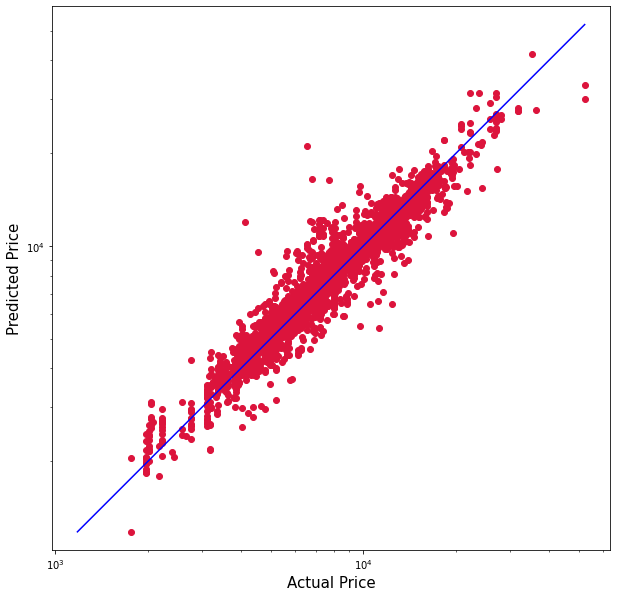

In [99]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(predicted), max(y_test))
p2 = min(min(predicted), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.axis('equal')
plt.show()

# Test Data

### Importing Test data

In [100]:
# Reading the excel file 
test_df = pd.read_excel("Test_set.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


This test dataset has no target variable, we need to use trained data to get the ticket price prediction.

In [101]:
# Checking the dimension of test dataset
test_df.shape

(2671, 10)

There are 2671 rows and 10 columns.

In [102]:
# Checking columns in test dataset
test_df.columns.tolist()

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [103]:
# Checking the types of columns
test_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

All columns have object datatype. We will convert them to numeric data format using encoder.

# Feature Engineering

* The columns Date_of_Journey, Dep_Time and Arrival_Time showing object datatype.
* As the data in it is datetime format, we have to convert it to timestamp for proper prediction.

In [104]:
# Converting Date and Time columns from object type to Date type
test_df['Date_of_Journey']=pd.to_datetime(test_df['Date_of_Journey'])
test_df['Dep_Time']=pd.to_datetime(test_df['Dep_Time'])
test_df['Arrival_Time']=pd.to_datetime(test_df['Arrival_Time'])

In [105]:
# Checking dtypes again
test_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

Now splitting Date_of_journey into Month and Day, and as the dataset contains only 2019 year data so no need to take year column

In [106]:
# Extracting Day from Date_of_journey column
test_df['Journey_Day'] = pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_journey column
test_df['Journey_Month'] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.month

So we have splitted the column Date_of_Journey into integer datatype , now we can drop this column as it is of no use.

In [107]:
# Dropping Date_of_journey column
test_df.drop("Date_of_Journey",axis=1,inplace=True)

In [108]:
# Duration

test_df['Duration']=test_df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

#now lets convert this column into a numeric

test_df['Duration']=pd.to_numeric(test_df['Duration'])

Extracting hours and mins from Arrival_Time column and dropping that column.

In [109]:
# Extracting Hours from Dep_Time column
test_df['Dep_Hour']=pd.to_datetime(test_df['Dep_Time']).dt.hour

# Extracting Minutes from Dep_Time column
test_df['Dep_Min']=pd.to_datetime(test_df['Dep_Time']).dt.minute

In [110]:
# Dropping Dep_Time column
test_df.drop("Dep_Time",axis=1,inplace=True)

Similarly extracting hours and mins from Arrival_Time column and dropping that column.

In [111]:
# Extracting Arrival_Hour from Arrival_Time column
test_df['Arrival_Hour']=pd.to_datetime(test_df['Arrival_Time']).dt.hour

# Extracting Arrival_Min from Arrival_Time column
test_df['Arrival_Min']=pd.to_datetime(test_df['Arrival_Time']).dt.minute

# Dropping Arruval_Time column
test_df.drop("Arrival_Time",axis=1,inplace=True)

In [112]:
# Checking test datasert again
test_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,6,23,55,2,45


In [113]:
test_df.shape

(2671, 13)

In [114]:
# Checking the value counts of each columns
for i in test_df.columns:
        print(test_df[i].value_counts())
        print("-\n")

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
-

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
-

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
-

DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
BLR → BOM → IDR → GWL → DEL      1
BLR → GOI → DEL

From the above value counts we can observe some repeated categories in some columns. Let's replace them.

In [115]:

# Replacing "Jet Airways Business" as "Jet Airways" in the column Airline
test_df["Airline"] = test_df["Airline"].replace("Jet Airways Business","Jet Airways")

# Replacing "Multiple carriers Premium economy" as "Multiple carriers" in Airline column
test_df["Airline"] = test_df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

# Replacing "Vistara Premium economy" as "Vistara" in Airline column
test_df["Airline"] = test_df["Airline"].replace("Vistara Premium economy","Vistara")

# Replacing "New Delhi" as "Delhi" in Destination column
test_df["Destination"] = test_df["Destination"].replace("New Delhi","Delhi")

# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
test_df["Additional_Info"] = test_df["Additional_Info"].replace("No info","No Info")

# Replacing "1 Long layover" and "2 Long layover" as "Long layover"in the column Additional Info
test_df["Additional_Info"] = test_df["Additional_Info"].replace(["1 Long layover","2 Long layover"],"Long layover")

Now let's check the value counts in the above columns

In [116]:
val_count = ["Airline","Destination", "Additional_Info"]

for i in val_count:
    print(test_df[i].value_counts())
    print("\n")

Jet Airways          899
IndiGo               511
Air India            440
Multiple carriers    350
SpiceJet             208
Vistara              131
Air Asia              86
GoAir                 46
Name: Airline, dtype: int64


Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


No Info                         2148
In-flight meal not included      444
No check-in baggage included      76
Long layover                       1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64




We have replaced the repeated categories that were present in the above columns.

In [117]:
# Checking number of unique values in each column
test_df.nunique()

Airline              8
Source               5
Destination          5
Route              100
Duration           320
Total_Stops          5
Additional_Info      6
Journey_Day          9
Journey_Month        7
Dep_Hour            24
Dep_Min             12
Arrival_Hour        24
Arrival_Min         12
dtype: int64

In [118]:
# Checking null values in the dataframe
test_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Journey_Day        0
Journey_Month      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

# Description of Test Dataset

In [119]:
# Statistical summary of test dataset
test_df.describe()

,Duration,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,2671.00000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,639.74167,12.026956,5.607263,12.603519,24.891426,13.585174,24.558218
std,502.18693,8.564408,3.042952,5.686673,19.086522,7.040396,16.775436
min,5.00000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,175.00000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,520.00000,6.000000,5.000000,12.000000,25.000000,15.000000,25.000000
75%,915.00000,21.000000,6.000000,18.000000,45.000000,19.000000,35.000000
max,2440.00000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

From the above description we can observe the following things

* The counts of every column is same which means there are no missing values preent in the dataset.
* The mean value is greater than the median(50%) in the columns Journey_Day, Duration_hours and Dep_Hour so we can say they are skewed to right.
* The median(50%) is bit greater than mean in Duration_mins, Dep_Min, Arrival_Hour and Arrival_Min which means they are skewed to left.
* In summarizing the data we can observe that there is bit differences between 75% and max which means some outliers present in the data.

In [120]:
# checking for categorical columns
categorical_col=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [121]:
# Now checking for numerical columns
numerical_col=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Duration', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


# Identifying outliers

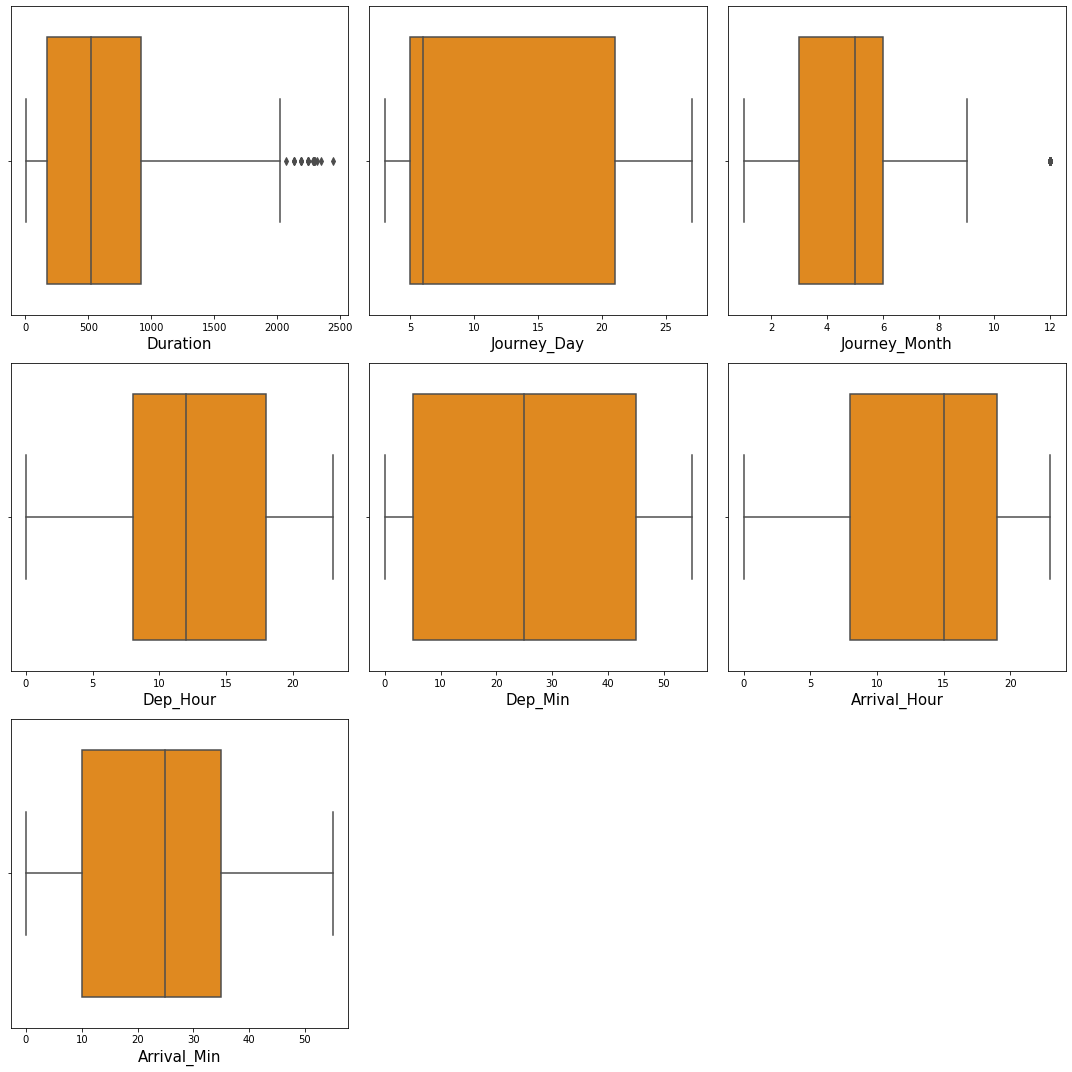

In [122]:
# Identifying outliers using boxplot
plt.figure(figsize=(15,15),facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(test_df[col],color='darkorange')
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.tight_layout()

We can notice outliers in Journey_Month and Duration, lets remove outliers using zscore method.

# Removing Outliers

### Zscore method

In [123]:
# Features containing outliers
features = test_df[["Duration","Journey_Month"]]
from scipy.stats import zscore
z = np.abs(zscore(features))
z

,Duration,Journey_Month
0,0.030389,0.129089
1,0.796151,2.101227
2,1.563970,0.199601
3,0.279347,0.199601
4,0.935567,0.129089
...,...,...
2666,1.583887,0.129089
2667,0.965442,0.856981
2668,0.487443,0.129089
2669,0.548222,0.129089


We have removed the outliers

In [124]:
#Creating new dataframe
new_test_df = test_df[(z<3).all(axis=1)]
new_test_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No Info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No Info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No Info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No Info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1435,1 stop,No Info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,155,non-stop,No Info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,395,1 stop,No Info,3,6,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,915,1 stop,No Info,3,6,4,0,19,15


In [125]:
test_df.shape

(2671, 13)

In [126]:
new_test_df.shape

(2653, 13)

In [127]:
#checking data loss
loss = (2671-2653)/2671*100
loss

0.6739049045301385

Here we are losing very less data hence removing outliers.

# Checking Skewness

In [128]:
# Checking skewness in test dataset
new_test_df.skew()

Duration         0.809826
Journey_Day      0.475210
Journey_Month    0.591565
Dep_Hour         0.083357
Dep_Min          0.132681
Arrival_Hour    -0.432551
Arrival_Min      0.110111
dtype: float64

# Removing Skewness

In [129]:
#Removing skewness using log transformation
new_test_df["Duration"]=np.log1p(new_test_df["Duration"])
new_test_df["Journey_Month"]=np.log1p(new_test_df["Journey_Month"])

In [130]:
# Checking skewness again
new_test_df.skew()

Duration        -0.229080
Journey_Day      0.475210
Journey_Month   -0.541053
Dep_Hour         0.083357
Dep_Min          0.132681
Arrival_Hour    -0.432551
Arrival_Min      0.110111
dtype: float64

The skewness has been removed.

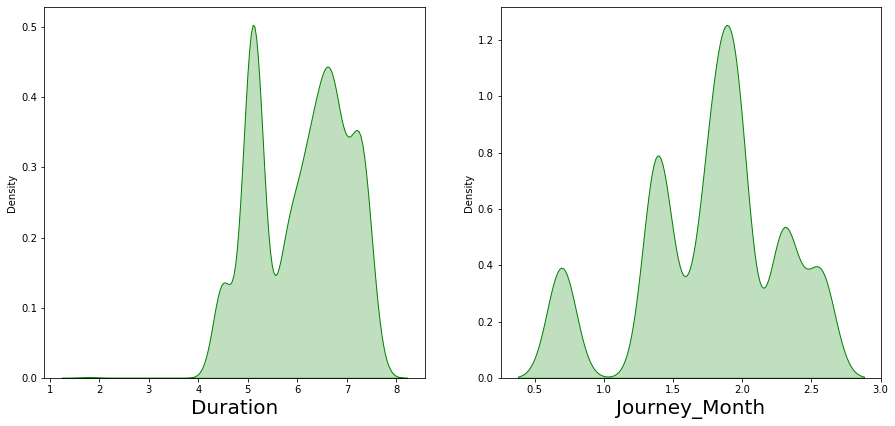

In [131]:
# Checking how the data has been distributed after removing the skewness
skew = ["Duration","Journey_Month"]
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in new_test_df[skew]:
    if plotnumber<=2:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(new_test_df[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can observe the data is almost normal compared and skewness is also not there.

# Encoding Categorical data

In [132]:
# Encoding data using label encoding method
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_test_df[categorical_col]= new_test_df[categorical_col].apply(LE.fit_transform)
new_test_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,4,2,1,76,6.486161,0,4,6,1.945910,17,30,4,25
1,3,3,0,65,5.484797,0,4,5,2.564949,6,20,10,20
2,4,2,1,76,7.262629,0,2,21,1.791759,19,15,19,0
3,5,2,1,76,6.660575,0,4,21,1.791759,8,0,21,0
4,0,0,2,16,5.141664,4,4,24,1.945910,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,7.269617,0,4,6,1.945910,20,30,20,25
2667,3,3,0,43,5.049856,4,4,27,1.386294,14,20,16,55
2668,4,2,1,76,5.981414,0,4,3,1.945910,21,50,4,25
2669,1,2,1,76,6.820016,0,4,3,1.945910,4,0,19,15


We have converted the categorical columns into numerical columns using label encoding method.

# Feature Scaling using Standard Scalarization

In [133]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_test_df = pd.DataFrame(scaler.fit_transform(new_test_df),columns=new_test_df.columns)
new_test_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,0.233214,0.031440,-0.167242,0.804966,0.438880,-0.791072,0.393727,-0.706193,0.344970,0.766320,0.272445,-1.354818,0.025591
1,-0.348833,0.873978,-1.175634,0.398570,-0.681421,-0.791072,0.393727,-0.823069,1.565339,-1.172433,-0.252462,-0.503215,-0.272182
2,0.233214,0.031440,-0.167242,0.804966,1.307572,-0.791072,-2.166466,1.046954,0.041078,1.118821,-0.514916,0.774190,-1.463273
3,0.815260,0.031440,-0.167242,0.804966,0.634010,-0.791072,0.393727,1.046954,0.041078,-0.819933,-1.302277,1.058057,-1.463273
4,-2.094973,-1.653635,0.841150,-1.411740,-1.065309,1.429790,0.393727,1.397583,0.344970,1.823822,1.584714,-1.638686,1.216682
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,-1.512927,0.873978,-1.175634,-0.118662,1.315390,-0.791072,0.393727,-0.706193,0.344970,1.295071,0.272445,0.916123,0.025591
2649,-0.348833,0.873978,-1.175634,-0.414222,-1.168021,1.429790,0.393727,1.748212,-0.758252,0.237569,-0.252462,0.348388,1.812227
2650,0.233214,0.031440,-0.167242,0.804966,-0.125818,-0.791072,0.393727,-1.056822,0.344970,1.471321,1.322260,-1.354818,0.025591
2651,-1.512927,0.031440,-0.167242,0.804966,0.812389,-0.791072,0.393727,-1.056822,0.344970,-1.524934,-1.302277,0.774190,-0.569955


We have scaled the data using StandardScalarization method to overcome with the issue of biasness.

###### As we have already loaded the saved model after saving the final model. Now let's predict the flight price using test data

# Prediction Result

In [134]:
# Predicting the flight price from the features of the testing data
Predicted_Price = Model.predict(new_test_df)
Predicted_Price

array([13990.69  ,  4431.118 , 12846.833 , ..., 16631.877 , 13210.868 ,
        7801.4995], dtype=float32)

###### Here we are using predicted final model which is saved as Model to predict the price of the test dataset.

## Creating DataFrame and Saving the Predictions

In [135]:
Prediction = pd.DataFrame()
Prediction['Price'] = Predicted_Price
Prediction

,Price
0,13990.690430
1,4431.118164
2,12846.833008
3,10511.018555
4,3230.253174
...,...
2648,8735.728516
2649,5129.979980
2650,16631.876953
2651,13210.868164


In [136]:
# Saving the Predictions
Prediction.to_csv("Predicted_Flight_Price_Data.csv",index=False)

##### WE HAVE SUCCESSFULLY COMPLETEDE PREDICTING THE FLIGHT PRICES OF VARIOUS AIRLINES